In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all lib imported')

all lib imported


In [3]:
data = pd.read_csv('advertising.csv', index_col='Unnamed: 0')

In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Assumption of Linear Regression

In [6]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


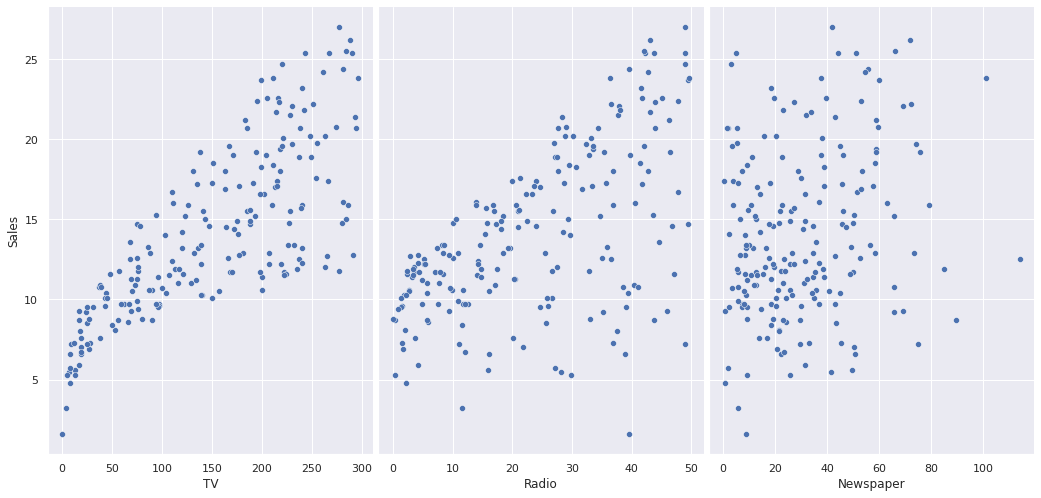

In [6]:
# visualize the relationship with target var
# check linearity with target and independent variables
sns.set(style='darkgrid')
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7)
plt.show()

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
# apply scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
#apply lr
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [11]:
#evaluate
from sklearn.metrics import mean_squared_error, r2_score
print('mse', mean_squared_error(y_test, y_pred))
print('test r2 ', r2_score(y_test, y_pred))

mse 2.880023730094192
test r2  0.8935163320163658


In [12]:
y_pred_train = lr.predict(X_train)
print('test r2 ', r2_score(y_train, y_pred_train))

test r2  0.8966445527601499


In [13]:
# 2. Normality of Residuals

In [14]:
residuals_train = y_pred_train - y_train
residuals_test = y_pred - y_test

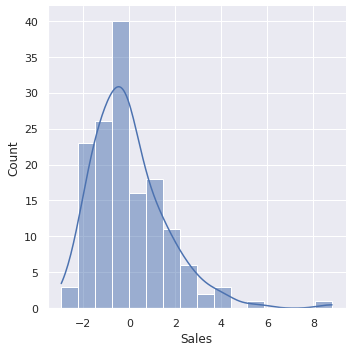

In [15]:
sns.displot(residuals_train, kde=True)
plt.show()

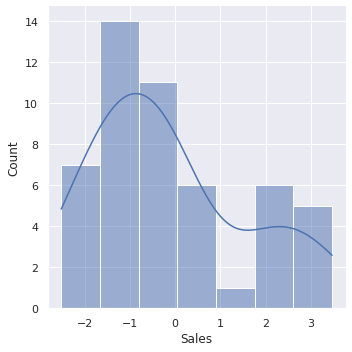

In [16]:
sns.displot(residuals_test, kde=True)
plt.show()

In [17]:
mean_residual_train = np.mean(residuals_train)
mean_residual_train

2.0724163126336257e-15

In [18]:
mean_residual_test = np.mean(residuals_test)
mean_residual_test

-0.12408881721282068

In [19]:
# Mean of residuals should be zero, very close to zero mean, all good here

In [20]:
# 3. Homoscedasticity (constant variance of residuals)

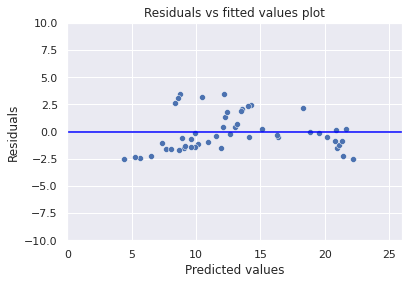

In [21]:
sns.scatterplot(x=y_pred, y=residuals_test)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10, 10)
plt.xlim(0, 26)
sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title('Residuals vs fitted values plot')
plt.show()

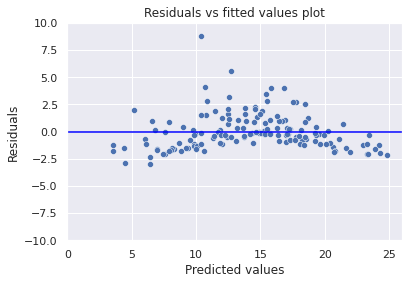

In [22]:
sns.scatterplot(x=y_pred_train, y=residuals_train)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10, 10)
plt.xlim(0, 26)
sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title('Residuals vs fitted values plot')
plt.show()

# Test - Goldfeld Quandt Test
1. null hypothesis - Error terms are homogeneous
2. alternate hypothesis - Error terms are heterogeneous

In [23]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-stat', 'p-value']
test = sms.het_goldfeldquandt(residuals_train, X_train)
lzip(name, test)

[('F-stat', 1.1774155359126528), ('p-value', 0.24505551247848328)]

In [24]:
# p value is more than 0.05 in the test, we can reject the null hypothesis

# 4. No autocorrelation of residuals
previous error (residual) should not affect the next error

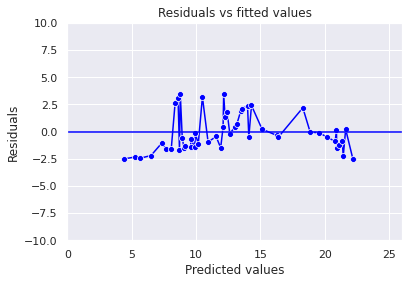

In [25]:
sns.lineplot(x=y_pred, y=residuals_test, marker='o', color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10, 10)
plt.xlim(0, 26)
sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title('Residuals vs fitted values')
plt.show()

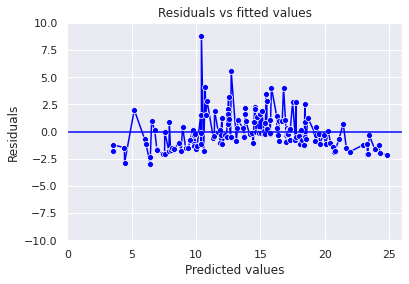

In [26]:
sns.lineplot(x=y_pred_train, y=residuals_train, marker='o', color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10, 10)
plt.xlim(0, 26)
sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title('Residuals vs fitted values')
plt.show()

In [27]:
#5. No perfect multi collinearity - (independent variables should not be correlated)

<AxesSubplot: >

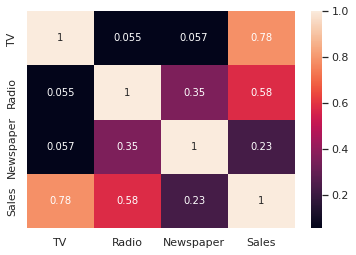

In [28]:
sns.heatmap(data.corr(), annot=True)

In [29]:
# some correlation between newspaper and radio - but not very high

In [30]:
# 3 var

#    X            y
# TV, radio       Newspaper
#
# y = mx + c      apply regression, calculate R2 score VIFi = 1/1 - R2i
#
#    X            y
# TV, Newspaper   radio    
#
# y = mx + c      apply regression, calculate R2 score VIFi = 1/1 - R2i
#
#    X              y
# radio,Newspaper   TV    
#
# y = mx + c      apply regression, calculate R2 score VIFi = 1/1 - R2i

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
indp_vars = ['TV', 'Radio', 'Newspaper']

X = data[indp_vars]
vif_data = pd.DataFrame()
vif_data['Var'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         Var       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [32]:
# vif = 1, no multico
# vif > 1 increase levels of multi co
# vif 5 to 10 problem
# drop the columns with high vif, to remove multi collinearity 

In [33]:
# R2 score = 1 - ssr / sst

# ssr = (y_test - y_pred)
# sst = (y_test - y_mean)

In [34]:
# adjusted R2 score -- that accounts for number of predictors in the model

# 1 - ((1-R2)(n-1)/(n-k-1))

# n = number of observation
# k = number of predictors (independent variables)

# - infinity to +1

# R2 score for each additional predictor that does not significantly improve the model

# house price pred -> area, bedrooms , r2 0.9 adj r2 score - 0.9
#                  - area, bedrooms, bathrooms r2 score - 0.92, adj r2 score - 0.9
# number of bathrooms has less impact on house price pred.
# Adding r2 score improve adding more variables but adj r2 score doesn't improve

In [35]:
import statsmodels.api as sm

# add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# fit the regression line using OLS
lr = sm.OLS(y_train,X_train_sm).fit()

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           1.02e-71
Time:                        18:49:47   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9915      0.138    101.356      0.0

In [37]:
# here newspaper variable p value is 0.722, which is greater than 0.05 
# it means newspaper is not significant, we can drop them.

In [41]:
# goodness of model vs model complexity 
#
# AIC talks about model complexity and aims to decrease over fitting 
# AIC - lowest AIC is selected.
# 
# BIC - variant of AIC. places strong penalty of model complexity; lowest BIC is selected; 